In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
colnames = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","una1","una2","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","result"]
# len(colnames)

In [48]:
df=pd.read_csv('/content/drive/MyDrive/kddcup.data_10_percent_corrected',header=None,names=colnames)

In [49]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,una1,una2,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [50]:
df.shape

(494021, 42)

In [52]:
pd.Series(df.protocol_type.value_counts(ascending=True))

udp      20354
tcp     190065
icmp    283602
Name: protocol_type, dtype: int64

In [53]:
df['result'].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [54]:
df['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [51]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
una1                           0
una2      

In [55]:
df['service'].unique()

array(['http', 'smtp', 'finger', 'domain_u', 'auth', 'telnet', 'ftp',
       'eco_i', 'ntp_u', 'ecr_i', 'other', 'private', 'pop_3', 'ftp_data',
       'rje', 'time', 'mtp', 'link', 'remote_job', 'gopher', 'ssh',
       'name', 'whois', 'domain', 'login', 'imap4', 'daytime', 'ctf',
       'nntp', 'shell', 'IRC', 'nnsp', 'http_443', 'exec', 'printer',
       'efs', 'courier', 'uucp', 'klogin', 'kshell', 'echo', 'discard',
       'systat', 'supdup', 'iso_tsap', 'hostnames', 'csnet_ns', 'pop_2',
       'sunrpc', 'uucp_path', 'netbios_ns', 'netbios_ssn', 'netbios_dgm',
       'sql_net', 'vmnet', 'bgp', 'Z39_50', 'ldap', 'netstat', 'urh_i',
       'X11', 'urp_i', 'pm_dump', 'tftp_u', 'tim_i', 'red_i'],
      dtype=object)

In [56]:
df['flag'].unique()

array(['SF', 'S1', 'REJ', 'S2', 'S0', 'S3', 'RSTO', 'RSTR', 'RSTOS0',
       'OTH', 'SH'], dtype=object)

In [57]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

df['protocol_type'] = number.fit_transform(df['protocol_type'])
df['service'] = number.fit_transform(df['service'])
df['flag'] = number.fit_transform(df['flag'])

In [58]:
df["result"] = np.where(df.result == "normal.",1,0)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  int64  
 2   service                      494021 non-null  int64  
 3   flag                         494021 non-null  int64  
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [60]:
##Train Test Split to overcome overfitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['result'],axis=1),df['result'],test_size=0.3,random_state=0)

**Feature Selection - INFORMATION GAIN**

In [61]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info

array([3.64023595e-02, 2.17612925e-01, 4.15720883e-01, 8.77915045e-02,
       4.60538301e-01, 3.68951599e-01, 1.27174450e-03, 8.14745683e-04,
       0.00000000e+00, 1.47886699e-03, 1.10385781e-03, 2.64834203e-01,
       0.00000000e+00, 6.10215156e-04, 5.59853485e-04, 1.94394025e-03,
       0.00000000e+00, 2.81912907e-04, 1.86375386e-03, 3.48436363e-04,
       2.79172603e-04, 1.27617962e-03, 4.46686270e-01, 2.60868949e-01,
       4.49206799e-02, 4.75955839e-02, 8.55406221e-04, 1.55313645e-03,
       8.94039330e-02, 5.77019577e-02, 1.10243377e-01, 2.42163447e-01,
       1.44449241e-01, 1.37637611e-01, 1.13485994e-01, 2.94630865e-01,
       1.85619184e-01, 5.33468275e-02, 5.73062020e-02, 5.96929540e-03,
       1.57474889e-02])

In [62]:
mutual_info = pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

src_bytes                      0.460538
count                          0.446686
service                        0.415721
dst_bytes                      0.368952
dst_host_same_src_port_rate    0.294631
logged_in                      0.264834
srv_count                      0.260869
dst_host_count                 0.242163
protocol_type                  0.217613
dst_host_srv_diff_host_rate    0.185619
dst_host_srv_count             0.144449
dst_host_same_srv_rate         0.137638
dst_host_diff_srv_rate         0.113486
una2                           0.110243
srv_diff_host_rate             0.089404
flag                           0.087792
una1                           0.057702
dst_host_srv_serror_rate       0.057306
dst_host_serror_rate           0.053347
srv_serror_rate                0.047596
serror_rate                    0.044921
duration                       0.036402
dst_host_srv_rerror_rate       0.015747
dst_host_rerror_rate           0.005969
num_root                       0.001944


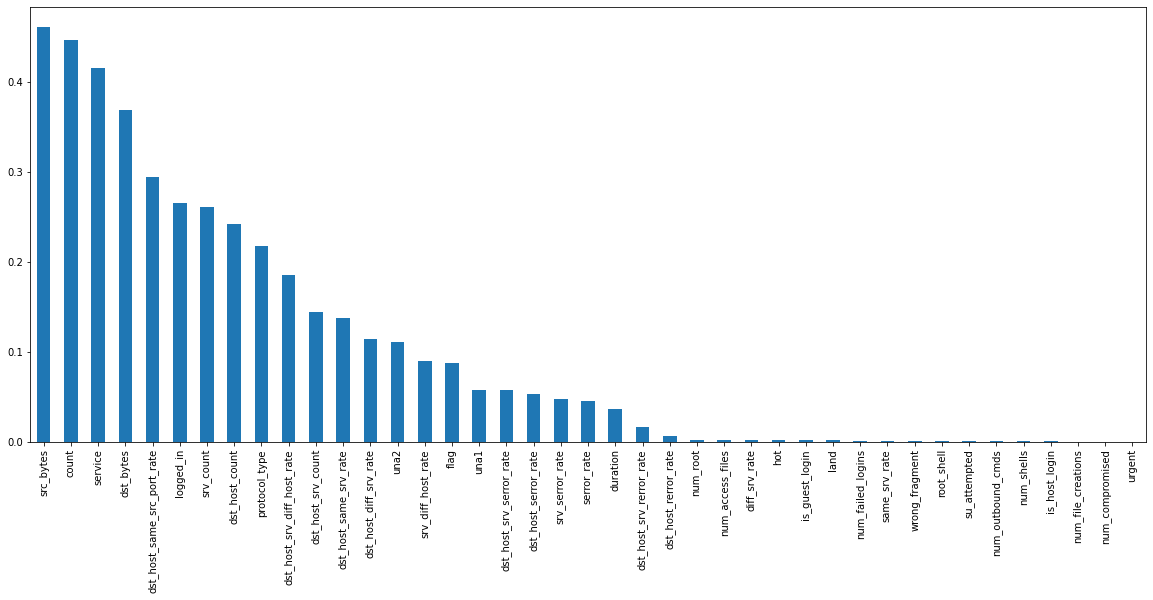

In [63]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [64]:
from sklearn.feature_selection import SelectKBest
sel_four_cols=SelectKBest(mutual_info_classif,k=4)
sel_four_cols.fit(X_train,y_train)
X_train.columns[sel_four_cols.get_support()]

Index(['service', 'src_bytes', 'dst_bytes', 'count'], dtype='object')

**Feature Selection - CORRELATION**

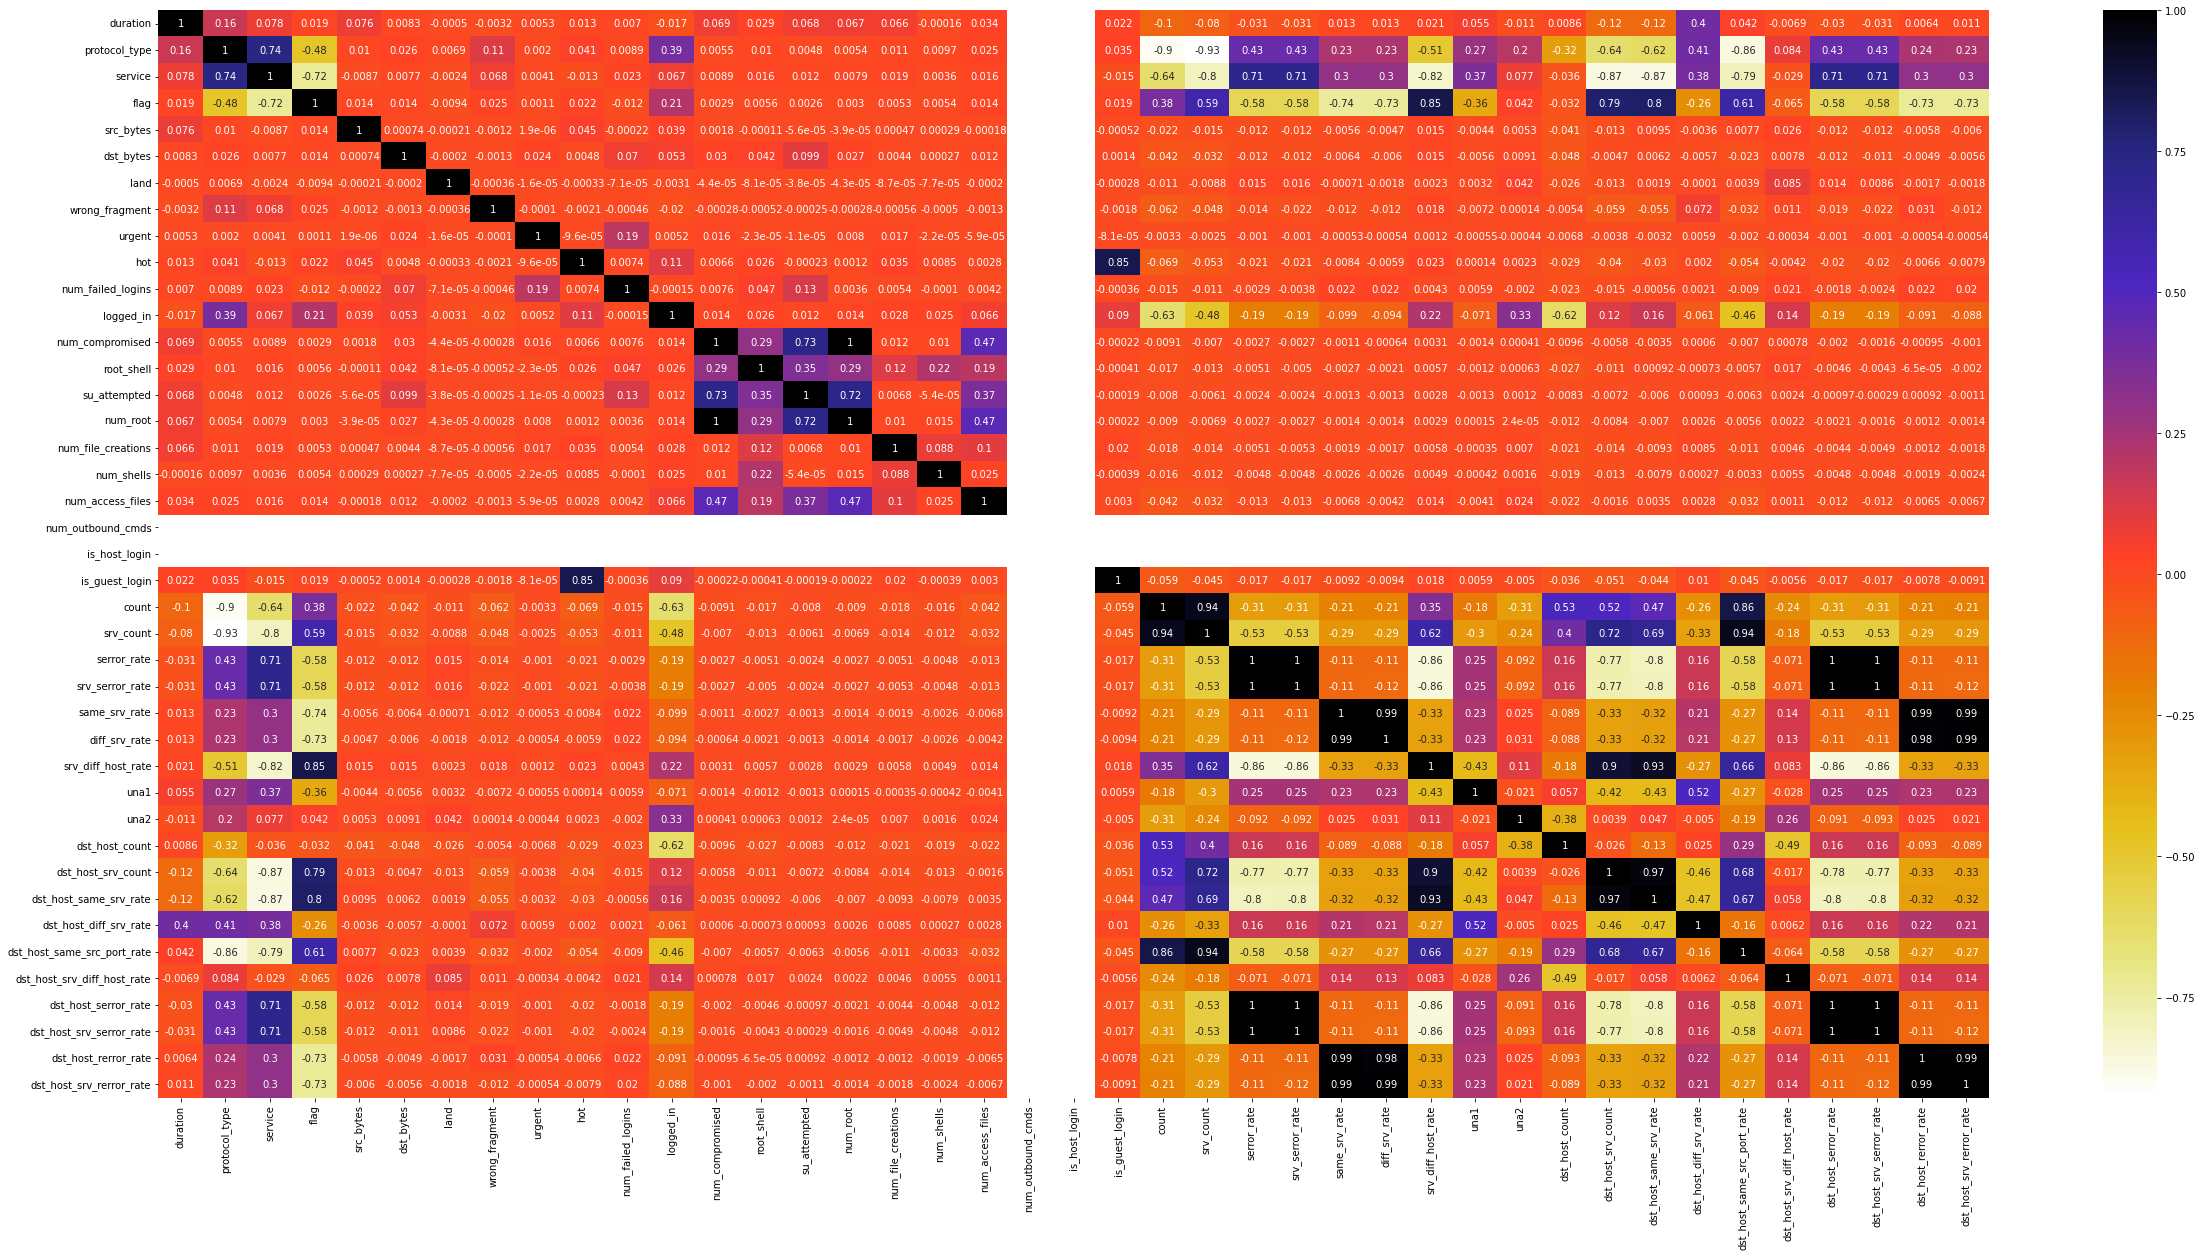

In [71]:
import seaborn as sns
plt.figure(figsize=(41,20))
cor = X_train.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [85]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if (corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr 


In [88]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

13

In [87]:
corr_features

{'diff_srv_rate',
 'dst_host_rerror_rate',
 'dst_host_same_src_port_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'is_guest_login',
 'num_root',
 'srv_count',
 'srv_diff_host_rate',
 'srv_serror_rate'}

In [89]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,count,serror_rate,same_srv_rate,una1,una2,dst_host_count,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate
22650,1,1,50,9,1022,389,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0.0,0.0,0.00,0.0,83,0.02,0.02
5765,0,1,22,9,376,285,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0.0,0.0,0.00,0.0,255,0.00,0.00
241826,0,0,14,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,0.0,0.0,0.00,0.0,255,0.00,0.00
292391,0,0,14,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,0.0,0.0,0.00,0.0,255,0.00,0.00
392127,0,1,45,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,252,1.0,0.0,0.05,0.0,255,0.06,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251770,0,0,14,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,0.0,0.0,0.00,0.0,255,0.00,0.00
132756,0,0,14,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,0.0,0.0,0.00,0.0,255,0.00,0.00
220325,0,0,14,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,509,0.0,0.0,0.00,0.0,255,0.00,0.00
432762,0,0,14,9,520,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,0.0,0.0,0.00,0.0,255,0.00,0.00
